In [106]:
# Importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import warnings
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor

In [122]:
# Read the CSV file into a pandas dataframe
sales_df = pd.read_csv(r"D:\Subhashini\Datascience\final-retail_sales_forecast\sales_data_set.csv")
store_df = pd.read_csv(r"D:\Subhashini\Datascience\final-retail_sales_forecast\stores_data_set.csv")
Feature_df= pd.read_csv(r"D:\Subhashini\Datascience\final-retail_sales_forecast\Features_data_set.csv")
print(sales_df.head(10))
sales_df.shape

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False
5      1     1  12/03/2010      21043.39      False
6      1     1  19/03/2010      22136.64      False
7      1     1  26/03/2010      26229.21      False
8      1     1  02/04/2010      57258.43      False
9      1     1  09/04/2010      42960.91      False


(421570, 5)

In [123]:
print(store_df.head(5))
store_df.shape

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


(45, 3)

In [124]:
print(Feature_df.head())
Feature_df.shape

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  


(8190, 12)

In [125]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [126]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [127]:
Feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [128]:
# Merge df, df1, and df2 based on common columns
merged_df = pd.merge(sales_df, store_df, on='Store')
merged_df = pd.merge(merged_df, Feature_df, on=['Store', 'Date'])

In [129]:
# Check for missing values
print(merged_df.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64


In [130]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
 16  IsHoliday_y   421570 non-null  bool   
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [133]:
#Spliting numeric and Categorical data from train
#Train Numerical Data
sales_num=merged_df.select_dtypes(include=['float64', 'float32','int32','int64'])

#Train Categorical Data
sales_cat = merged_df.select_dtypes(include=['object', 'O'])

In [134]:
print('sales Num Var: ' , sales_num.columns.to_list())
print('\n','sales Cat Var: ', sales_cat.columns.to_list())

sales Num Var:  ['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']

 sales Cat Var:  ['Date', 'Type']


In [ ]:
#Here MarkDown 5 is highly skewed & MarkDown 1 and 4 are highly correlated

In [135]:
# Convert 'Date' column to datetime format 
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format="%d/%m/%Y")

# Convert boolean columns to numeric
merged_df['IsHoliday_x'] = merged_df['IsHoliday_x'].astype(int)
merged_df['IsHoliday_y'] = merged_df['IsHoliday_y'].astype(int)

In [136]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  int32         
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [137]:
merged_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = merged_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)

In [138]:
print(merged_df.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
dtype: int64


In [139]:
print(merged_df.shape)
merged_df.columns

(421570, 17)


Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y'],
      dtype='object')

In [140]:
for column in ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y']:
    print(f" {column}: {len(merged_df[column].unique())}")


 Store: 45
 Dept: 81
 Date: 143
 Weekly_Sales: 359464
 IsHoliday_x: 2
 Type: 3
 Size: 40
 Temperature: 3528
 Fuel_Price: 892
 MarkDown1: 2278
 MarkDown2: 1499
 MarkDown3: 1662
 MarkDown4: 1945
 MarkDown5: 2294
 CPI: 2145
 Unemployment: 349
 IsHoliday_y: 2


In [141]:
merged_df1=merged_df.copy()

In [142]:
merged_df1.copy()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0
1,1,2,2010-02-05,50605.27,0,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0
2,1,3,2010-02-05,13740.12,0,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0
3,1,4,2010-02-05,39954.04,0,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0
4,1,5,2010-02-05,32229.38,0,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,0,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0
421566,45,94,2012-10-26,5203.31,0,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0
421567,45,95,2012-10-26,56017.47,0,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0
421568,45,97,2012-10-26,6817.48,0,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0


In [146]:
import numpy as np

# Assuming merged_df1 is your DataFrame
# Identify numeric columns (excluding datetime columns)
numeric_columns = merged_df1.select_dtypes(include=[np.number]).columns

# Check for negative values in numeric columns
negative_values = merged_df1[numeric_columns].lt(0)

# Print the count of negative values in each numeric column
print("Count of negative values in each numeric column:")
print(negative_values.sum())

Count of negative values in each numeric column:
Store              0
Dept               0
Weekly_Sales    1285
IsHoliday_x        0
Size               0
Temperature       69
Fuel_Price         0
MarkDown1          0
MarkDown2       1311
MarkDown3        257
MarkDown4          0
MarkDown5          0
CPI                0
Unemployment       0
IsHoliday_y        0
dtype: int64


In [147]:
#Since sales and promotional offers (Markdown 2 and 3) cannot be negative, we will replace negative values with 0 
merged_df1.loc[merged_df1['Weekly_Sales'] < 0 ,'Weekly_Sales'] = 0
merged_df1.loc[merged_df1['MarkDown2'] < 0 ,'MarkDown2'] = 0
merged_df1.loc[merged_df1['MarkDown3'] < 0, 'MarkDown3'] = 0

In [152]:
merged_df1_cleaned = merged_df1[~merged_df1[numeric_columns].lt(0).any(axis=1)]
NR = merged_df1_cleaned[numeric_columns].lt(0)

# Print the count of negative values in each numeric column after removal
print("Count of negative values fter removal:")
print(NR.sum())


Count of negative values fter removal:
Store           0
Dept            0
Weekly_Sales    0
IsHoliday_x     0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
dtype: int64


Outlier checking

In [153]:
merged_df1['Weekly_Sales'] = np.where(merged_df1['Weekly_Sales']>100000,100000,merged_df1['Weekly_Sales'])

C:\Users\Pragadheesh\AppData\Local\Temp\ipykernel_36148\3154571334.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df1.Weekly_Sales)
c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf valu

<Axes: xlabel='Weekly_Sales', ylabel='Density'>

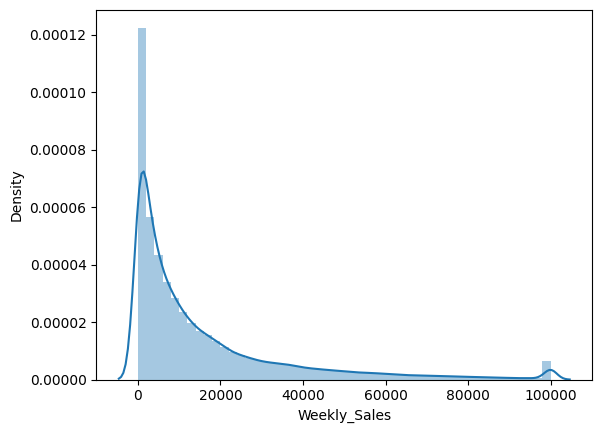

In [154]:
sns.distplot(merged_df1.Weekly_Sales)